In [2]:
import io
from PIL import Image
import textgrad as tg
from textgrad import get_engine
from textgrad.autograd import MultimodalLLMCall
from textgrad.loss import ImageQALoss

In [ ]:
import openai

client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")
engine = ChatExternalClient(client=client, model_string='lmstudio-community/Qwen2.5-7B-Instruct-1M-GGUF')
tg.set_backward_engine("gpt-4o", override=True)


NameError: name 'OpenAI' is not defined

: 

In [5]:
# import httpx

# Import necessary library
import httpx

# Path to the local image
image_path = "176.png"
# Read the local image file in binary mode
with open(image_path, 'rb') as file:
    image_data = file.read()

# Print the first few bytes of the image data to verify (optional)
print(image_data[:10])

b'\x89PNG\r\n\x1a\n\x00\x00'


In [6]:
image_variable = tg.Variable(image_data, role_description="image to answer a question about", requires_grad=False)

# MathVista-176, ground truth = (D) 2
question_text = """
Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. 
Question: Find $RS$ if $\triangle QRS$ is an equilateral triangle. 
Choices: (A) 0.5 (B) 1 (C) 1.5 (D) 2
"""
question_text = question_text.strip()
question_text

'Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. \nQuestion: Find $RS$ if $\triangle QRS$ is an equilateral triangle. \nChoices: (A) 0.5 (B) 1 (C) 1.5 (D) 2'

In [7]:
question_variable = tg.Variable(question_text, role_description="question", requires_grad=False)
question_variable

Variable(value=Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. 
Question: Find $RS$ if $	riangle QRS$ is an equilateral triangle. 
Choices: (A) 0.5 (B) 1 (C) 1.5 (D) 2, role=question, grads=set())

In [ ]:
engine = ChatExternalClient(client=client, model_string='lmstudio-community/Qwen2.5-7B-Instruct-1M-GGUF')
engine.generate("Can you outline the heros journey?")

response = MultimodalLLMCall('lmstudio-community/Qwen2.5-7B-Instruct-1M-GGUF')([image_variable, question_variable])
response

Variable(value=In an equilateral triangle, all sides are equal. Therefore, we have:

\[ 4x = 2x + 1 = 6x - 1 \]

First, equate \(4x\) and \(2x + 1\):

\[ 4x = 2x + 1 \]

Subtract \(2x\) from both sides:

\[ 2x = 1 \]

Divide by 2:

\[ x = 0.5 \]

Now, substitute \(x = 0.5\) into \(RS = 2x + 1\):

\[ RS = 2(0.5) + 1 = 1 + 1 = 2 \]

Thus, \(RS\) is 2.

The correct option is (D) 2., role=response from the language model, grads=set())

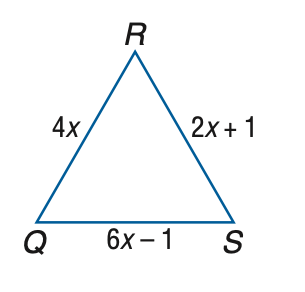

In [9]:
Image.open(io.BytesIO(image_data))

In [10]:
loss_fn = ImageQALoss(
    evaluation_instruction="Does this seem like a complete and good answer for the image? Criticize heavily.",
    # engine="claude-3-5-sonnet-20240620"
    engine="gpt-4o",
)
loss_fn

In [11]:
loss = loss_fn(question=question_variable, image=image_variable, response=response)
loss

Variable(value=The answer provided is correct and well-structured. Here's a breakdown of the solution:

1. **Understanding the Problem**: The problem involves finding the length of side \(RS\) in an equilateral triangle \(QRS\), where the sides are given as expressions in terms of \(x\).

2. **Equilateral Triangle Property**: In an equilateral triangle, all sides are equal. Therefore, the expressions for the sides are set equal to each other: \(4x = 2x + 1 = 6x - 1\).

3. **Solving for \(x\)**:
   - First, equate \(4x\) and \(2x + 1\):
     \[
     4x = 2x + 1
     \]
   - Subtract \(2x\) from both sides:
     \[
     2x = 1
     \]
   - Divide by 2 to solve for \(x\):
     \[
     x = 0.5
     \]

4. **Substituting \(x\) to Find \(RS\)**:
   - Substitute \(x = 0.5\) into the expression for \(RS\):
     \[
     RS = 2(0.5) + 1 = 1 + 1 = 2
     \]

5. **Conclusion**: The length of \(RS\) is 2, which corresponds to option (D).

The explanation is clear, logical, and follows a step-by-ste

In [12]:
optimizer = tg.TGD(parameters=[response])
optimizer

In [13]:
loss.backward()
optimizer.step()
print(response.value)

In an equilateral triangle, all sides are equal. Therefore, we have:

\[ 4x = 2x + 1 = 6x - 1 \]

To find \(x\), we can solve any two of these equations. Let's start with:

1. Equate \(4x\) and \(2x + 1\):

   \[ 4x = 2x + 1 \]

   Subtract \(2x\) from both sides:

   \[ 2x = 1 \]

   Divide by 2:

   \[ x = 0.5 \]

2. Verify by substituting \(x = 0.5\) into all expressions:

   - \(QR = 4(0.5) = 2\)
   - \(RS = 2(0.5) + 1 = 2\)
   - \(QS = 6(0.5) - 1 = 2\)

All sides are equal, confirming the solution's correctness.

3. Alternative Approach: You could also solve \(6x - 1 = 2x + 1\) to find \(x\), which would yield the same result, demonstrating the robustness of the solution.

4. Error Handling: If the equations did not yield a consistent value for \(x\), it would indicate an error in the problem setup or assumptions.

Thus, \(RS\) is 2.

The correct option is (D) 2.
